In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

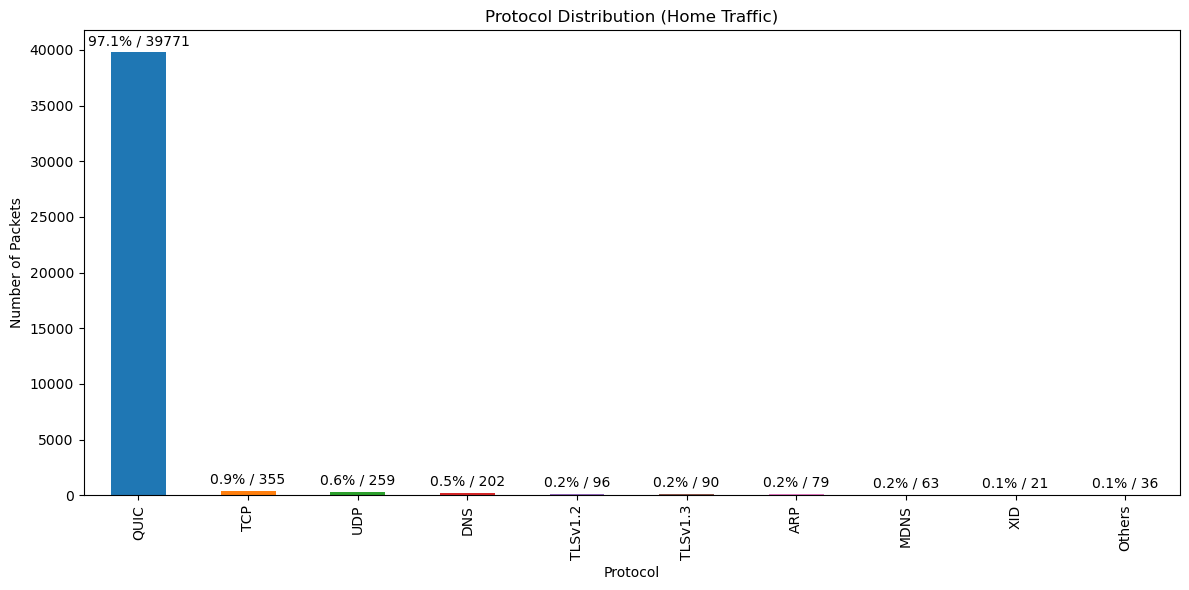

In [9]:
# Load CSV with correct column
df = pd.read_csv('/Users/deborahpark/Documents/GitHub/CS5344_Project2/Project2/home_traffic.csv', on_bad_lines='skip')

# Count using correct Protocol column
protocol_counts = df['_ws.col.protocol'].value_counts()

# Top 9 + Others
top9 = protocol_counts.head(9)
others = protocol_counts.iloc[9:].sum()
final_counts = pd.concat([top9, pd.Series({'Others': others})])

# Total count
total_packets = final_counts.sum()

# Plot
plt.figure(figsize=(12, 6))
colors = plt.cm.tab10(range(len(final_counts)))
bars = final_counts.plot(kind='bar', color=colors)

plt.title('Protocol Distribution (Home Traffic)')
plt.xlabel('Protocol')
plt.ylabel('Number of Packets')
plt.grid(False)
plt.tight_layout()

# Add % + count labels
for idx, value in enumerate(final_counts):
    percent = (value / total_packets) * 100
    plt.text(idx, value + max(final_counts) * 0.01, f'{percent:.1f}% / {int(value)}',
             ha='center', va='bottom', fontsize=10)

plt.show()


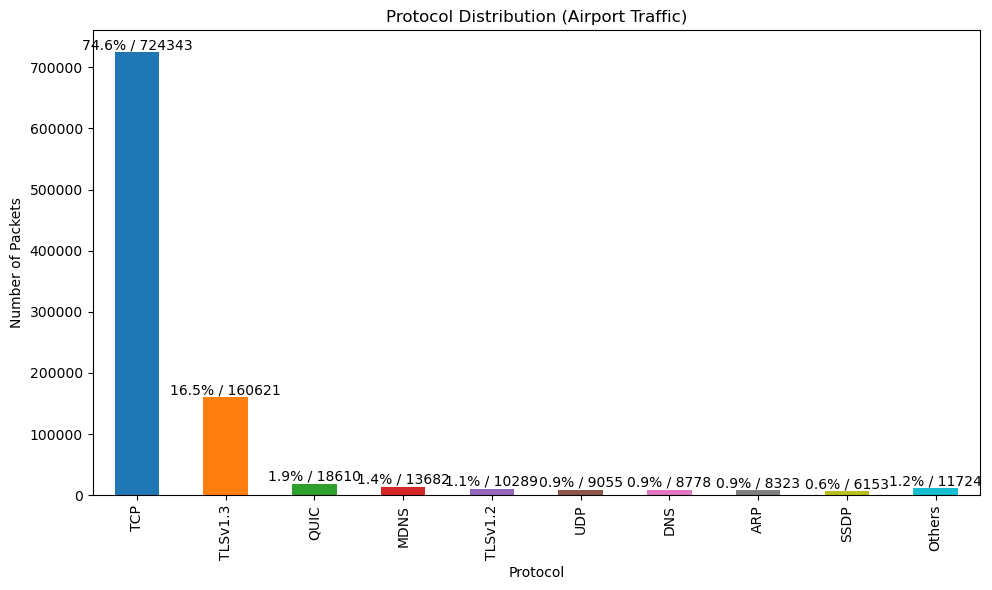

In [3]:
# Read the fixed CSV file
df = pd.read_csv('/Users/deborahpark/Documents/GitHub/CS5344_Project2/Project2/network_airport_fixed.csv')

# Count Protocol occurrences
protocol_counts = df['Protocol'].value_counts()

# Separate top 9 and the rest
top9 = protocol_counts.head(9)
others = protocol_counts.iloc[9:].sum()

# Combine into one new series using pd.concat
final_counts = pd.concat([top9, pd.Series({'Others': others})])

# Divide all counts by 20
final_counts = final_counts

# Total packet count (after division)
total_packets = final_counts.sum()

# Create bar chart
plt.figure(figsize=(10,6))
colors = plt.cm.tab10(range(len(final_counts)))

bars = final_counts.plot(kind='bar', color=colors)

plt.title('Protocol Distribution (Airport Traffic)')
plt.xlabel('Protocol')
plt.ylabel('Number of Packets')
plt.grid(False)
plt.tight_layout()

# Add percentage + rounded count labels above each bar
for idx, value in enumerate(final_counts):
    percent = (value / total_packets) * 100
    rounded_value = round(value)
    plt.text(idx, value + 0.5, f'{percent:.1f}% / {rounded_value}', ha='center', va='bottom', fontsize=10)

# Show plot
plt.show()


Total packets after division: 71960


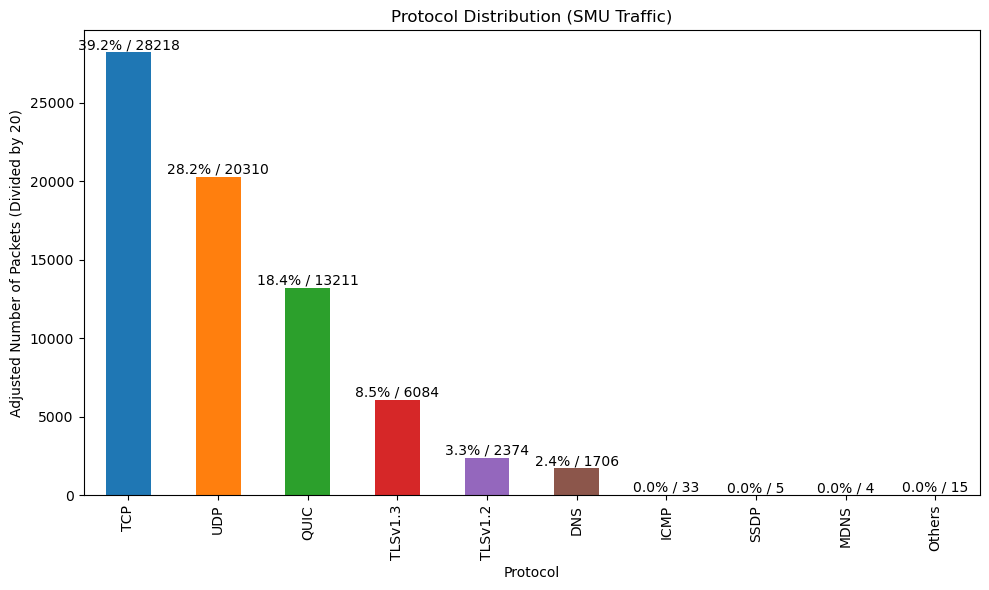

In [5]:
# Read the SMU traffic data
df = pd.read_csv('/Users/deborahpark/Documents/GitHub/CS5344_Project2/Project2/School_Packet_Capture.csv')

# Count occurrences of each protocol
protocol_counts = df['Protocol'].value_counts()

# Select top 9 protocols and group the rest into 'Others'
top9 = protocol_counts.head(9)
others = protocol_counts.iloc[9:].sum()
final_counts = pd.concat([top9, pd.Series({'Others': others})])

# Calculate total for percentage
total_packets = final_counts.sum()

# Plot
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(range(len(final_counts)))
bars = final_counts.plot(kind='bar', color=colors)

plt.title('Protocol Distribution (SMU Traffic)')
plt.xlabel('Protocol')
plt.ylabel('Adjusted Number of Packets (Divided by 20)')
plt.grid(False)
plt.tight_layout()

# Annotate each bar with percentage and rounded count
for idx, value in enumerate(final_counts):
    percent = (value / total_packets) * 100
    rounded_value = round(value)
    plt.text(idx, value + 0.5, f'{percent:.1f}% / {rounded_value}', ha='center', va='bottom', fontsize=10)

# Show total packet count in terminal
print(f"Total packets after division: {round(total_packets)}")

# Show the plot
plt.show()


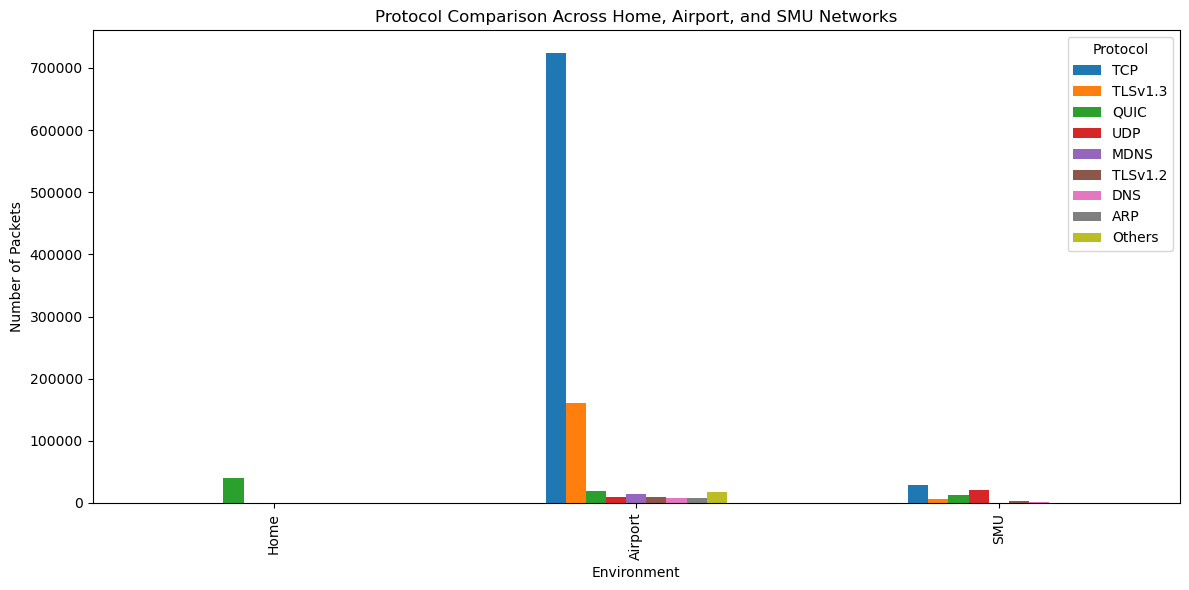

In [10]:
# Load protocol distributions from CSVs
home_df = pd.read_csv('/Users/deborahpark/Documents/GitHub/CS5344_Project2/Project2/home_traffic.csv', on_bad_lines='skip')
airport_df = pd.read_csv('/Users/deborahpark/Documents/GitHub/CS5344_Project2/Project2/network_airport_fixed.csv', on_bad_lines='skip')
school_df = pd.read_csv('/Users/deborahpark/Documents/GitHub/CS5344_Project2/Project2/School_Packet_Capture.csv', on_bad_lines='skip')

# Extract protocol frequency from each
home_protocols = home_df['_ws.col.protocol'].value_counts()
airport_protocols = airport_df['Protocol'].value_counts()
school_protocols = school_df['Protocol'].value_counts()

# Merge into one DataFrame
combined_df = pd.DataFrame({
    'Home': home_protocols,
    'Airport': airport_protocols,
    'SMU': school_protocols
}).fillna(0)

# Pick top 8 most used protocols overall
top_protocols = combined_df.sum(axis=1).sort_values(ascending=False).head(8).index
filtered_df = combined_df.loc[top_protocols]

# Add 'Others' as the sum of everything not in top 8
others = pd.DataFrame({
    'Home': combined_df.drop(index=top_protocols)['Home'].sum(),
    'Airport': combined_df.drop(index=top_protocols)['Airport'].sum(),
    'SMU': combined_df.drop(index=top_protocols)['SMU'].sum()
}, index=['Others'])

# Final combined DataFrame
final_df = pd.concat([filtered_df, others])
plot_df = final_df.T  # transpose for bar chart

# Plotting
plot_df.plot(kind='bar', figsize=(12, 6))
plt.title('Protocol Comparison Across Home, Airport, and SMU Networks')
plt.xlabel('Environment')
plt.ylabel('Number of Packets')
plt.legend(title='Protocol')
plt.grid(False)
plt.tight_layout()
plt.show()
